In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('tganv2_lrd_inception.npy').astype('f')
data2 = np.load('ode1_inception.npy').astype('f')

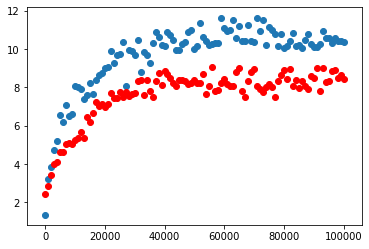

In [3]:
plt.scatter(data[0], data[1])
plt.scatter(data2[0], data2[1], c='r')

In [28]:
from models.tganv2_gen import CLSTM_cell, Generator_CLSTM
from models.ode_gen import ODEGen, GeneratorODE
from torchsummary import summary

In [29]:
lstm = CLSTM_cell(512).cuda()
ode = ODEGen(16, 512, False).cuda()

In [30]:
summary(lstm, (512, 4, 4))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 2048, 4, 4]       9,439,232
Total params: 9,439,232
Trainable params: 9,439,232
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.03
Forward/backward pass size (MB): 0.25
Params size (MB): 36.01
Estimated Total Size (MB): 36.29
----------------------------------------------------------------


In [31]:
summary(ode, (512, 4, 4))

TypeError: forward() takes 2 positional arguments but 3 were given

In [21]:
gen = Generator_CLSTM(
        tempc=512,
        zt_dim=4,
        upchannels=[256],
        subchannels=[128, 64, 32],
        n_frames=16,
        colors=3,
        subsample=2
    ).cuda()
summary(gen, (256,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 8192]       2,105,344
            Conv2d-2           [-1, 2048, 4, 4]       9,439,232
        CLSTM_cell-3  [[-1, 512, 4, 4], [-1, 512, 4, 4]]               0
            Conv2d-4           [-1, 2048, 4, 4]       9,439,232
            Conv2d-5           [-1, 2048, 4, 4]       9,437,184
        CLSTM_cell-6  [[-1, 512, 4, 4], [-1, 512, 4, 4]]               0
            Conv2d-7           [-1, 2048, 4, 4]       9,439,232
            Conv2d-8           [-1, 2048, 4, 4]       9,437,184
        CLSTM_cell-9  [[-1, 512, 4, 4], [-1, 512, 4, 4]]               0
           Conv2d-10           [-1, 2048, 4, 4]       9,439,232
           Conv2d-11           [-1, 2048, 4, 4]       9,437,184
       CLSTM_cell-12  [[-1, 512, 4, 4], [-1, 512, 4, 4]]               0
           Conv2d-13           [-1, 2048, 4, 4]       9,439,232
   

In [22]:
sum(p.numel() for p in gen.parameters())

23524172

In [23]:
sum(p.numel() for p in ode.parameters())

2359808

In [24]:
sum(p.numel() for p in lstm.parameters())

18876416

In [25]:
odegen = GeneratorODE(
        tempc=512,
        zt_dim=4,
        upchannels=[256],
        subchannels=[128, 64, 32],
        n_frames=16,
        colors=3,
        conv_cat=False,
        int_t=1
    ).cuda()

In [26]:
sum(p.numel() for p in odegen.parameters())

7007564